In this assignment students have to make ARIMA model over shampoo salesdata and check the MSE between predicted and actual value.

Student can download data in .csv format from the following link:

https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-threeyear-period#!ds =22r0&display=line

Hint:

Following is the command import packages

and data from pandas import read_csv

from pandas import datetime

from matplotlib import pyplot

from statsmodels.tsa.arima_model

import ARIMA from sklearn.metrics

import mean_squared_error

def parser(x):

return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0],

index_col=0, squeeze=True, date_parser=parser)

In [163]:
#Lests import necessory libraries
import pandas as pd
import numpy as np
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error



#For Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



#Import plotly
import warnings
warnings.filterwarnings('ignore')

In [164]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
data = pd.read_csv(r"C:\Users\saurav\Desktop\shampoo_sales.csv", header=0, parse_dates=True, index_col='Month')
data.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [165]:
data.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


# Step 2: Visualize the Data

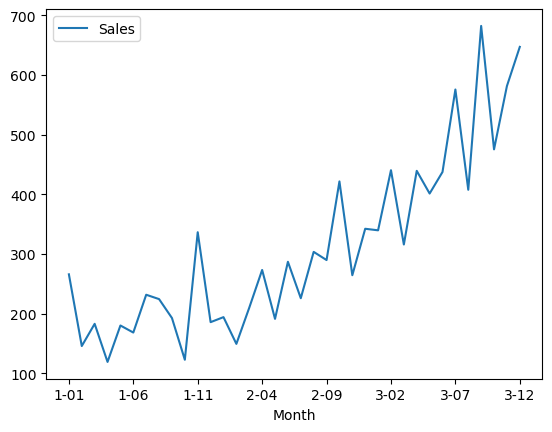

In [166]:
data.plot()
plt.show()

In [167]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [168]:
test_result=adfuller(data['Sales'])

In [169]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [170]:
adfuller_test(data['Sales'])

ADF Test Statistic : 3.0601420836411806
p-value : 1.0
#Lags Used : 10
Number of Observations Used : 25
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Differencing

In [171]:
#Here i am shifting the data by 12 because my dataset is seasonability problem
data['Seasonal First Difference']=data['Sales']-data['Sales'].shift(12)

In [173]:
data.head(15)

,Sales,Seasonal First Difference
Month,,
1-01,266.0,NaN
1-02,145.9,NaN
1-03,183.1,NaN
1-04,119.3,NaN
1-05,180.3,NaN
1-06,168.5,NaN
1-07,231.8,NaN
1-08,224.5,NaN
1-09,192.8,NaN


In [174]:
## Again test dickey fuller test
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -0.0456155341424791
p-value : 0.9545931714075309
#Lags Used : 6
Number of Observations Used : 17
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:xlabel='Month'>

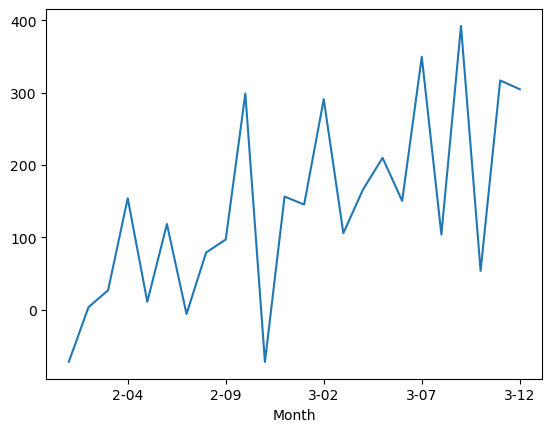

In [175]:
data['Seasonal First Difference'].plot()

    So, Here we can see that out model is become a Stationary.

# Auto Regressive Model

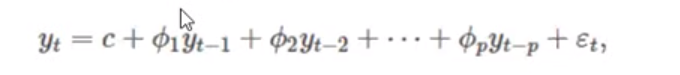

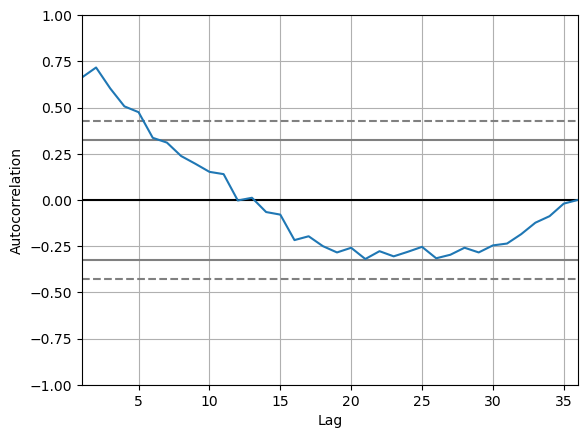

In [177]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Sales'])
plt.show()

Final Thoughts on Autocorrelation and Partial Autocorrelation
Identification of an AR model is often best done with the PACF.

For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
p,d,q p AR model lags d differencing q MA lags

In [178]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


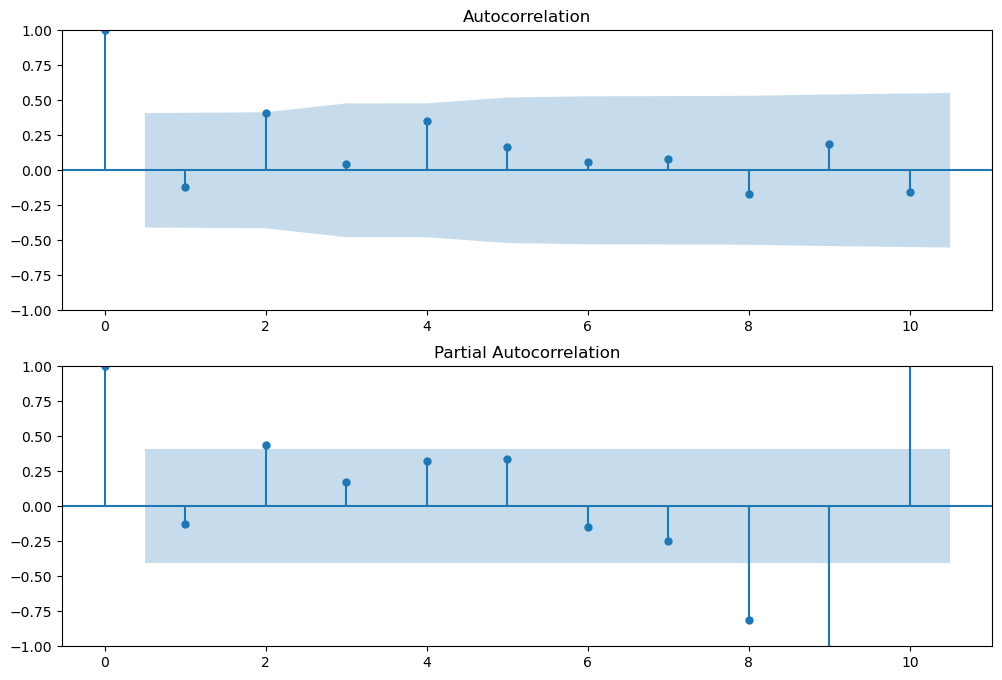

In [179]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Seasonal First Difference'].iloc[13:],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Seasonal First Difference'].iloc[13:],lags=10,ax=ax2)

In [180]:
x = data.values
x

array([[266. ,   nan],
       [145.9,   nan],
       [183.1,   nan],
       [119.3,   nan],
       [180.3,   nan],
       [168.5,   nan],
       [231.8,   nan],
       [224.5,   nan],
       [192.8,   nan],
       [122.9,   nan],
       [336.5,   nan],
       [185.9,   nan],
       [194.3, -71.7],
       [149.5,   3.6],
       [210.1,  27. ],
       [273.3, 154. ],
       [191.4,  11.1],
       [287. , 118.5],
       [226. ,  -5.8],
       [303.6,  79.1],
       [289.9,  97.1],
       [421.6, 298.7],
       [264.5, -72. ],
       [342.3, 156.4],
       [339.7, 145.4],
       [440.4, 290.9],
       [315.9, 105.8],
       [439.3, 166. ],
       [401.3, 209.9],
       [437.4, 150.4],
       [575.5, 349.5],
       [407.6, 104. ],
       [682. , 392.1],
       [475.3,  53.7],
       [581.3, 316.8],
       [646.9, 304.6]])

In [181]:
size = int(len(x) * 0.60)
print(len(x))
print(size)

36
21


In [182]:
# Split the data into train and test sets
train_data = data.iloc[:21, :]
test_data = data.iloc[21:, :]

# Create a SARIMAX model with order (1, 1, 1) and seasonal order (1, 1, 1, 12)
model = sm.tsa.statespace.SARIMAX(train_data['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Generate forecasts for the test data
start = test_data.index[0]
end = test_data.index[-1]
predictions = results.predict(start=21, end=35, dynamic=None)



In [183]:
# Calculate the mean squared error
mse = mean_squared_error(test_data['Sales'], predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 56307.96743132523


In [185]:
#Intern at Pranathi
#Student of DataTrained - Saurav
#Date - 21-04-2023
#Time-12:19